In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**pd.read_table() for web scraping**

In [222]:
col_names = ['Sex',' Length',' Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
                   delimiter=',',names = col_names)

In [3]:
df.head()

Sex   Length   Diameter  Height  Whole weight  Shucked weight  \
0   M    0.455      0.365   0.095        0.5140          0.2245   
1   M    0.350      0.265   0.090        0.2255          0.0995   
2   F    0.530      0.420   0.135        0.6770          0.2565   
3   M    0.440      0.365   0.125        0.5160          0.2155   
4   I    0.330      0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

In [4]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
 Length           4177 non-null float64
 Diameter         4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


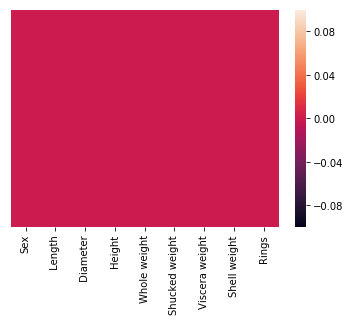

In [6]:
sns.heatmap(df.isna(),yticklabels=False)

In [7]:
df.skew()

 Length          -0.639873
 Diameter        -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [8]:
df.corr()

Length   Diameter    Height  Whole weight  Shucked weight  \
 Length         1.000000   0.986812  0.827554      0.925261        0.897914   
 Diameter       0.986812   1.000000  0.833684      0.925452        0.893162   
Height          0.827554   0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261   0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914   0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018   0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706   0.905330  0.817338      0.955355        0.882617   
Rings           0.556720   0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
 Length               0.903018      0.897706  0.556720  
 Diameter             0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weight        0.931961      0.882617  0.420884  
Viscera weight        1.000000      0.907656  0.503819  
Shell weight          0.907656      1.000000  0.627574  
Rings                 0.503819      0.627574  1.000000

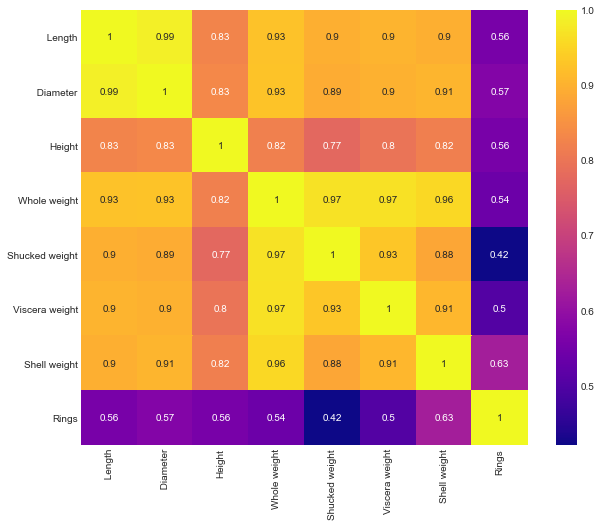

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [10]:
df.groupby('Sex').size()

Sex
F    1307
I    1342
M    1528
dtype: int64

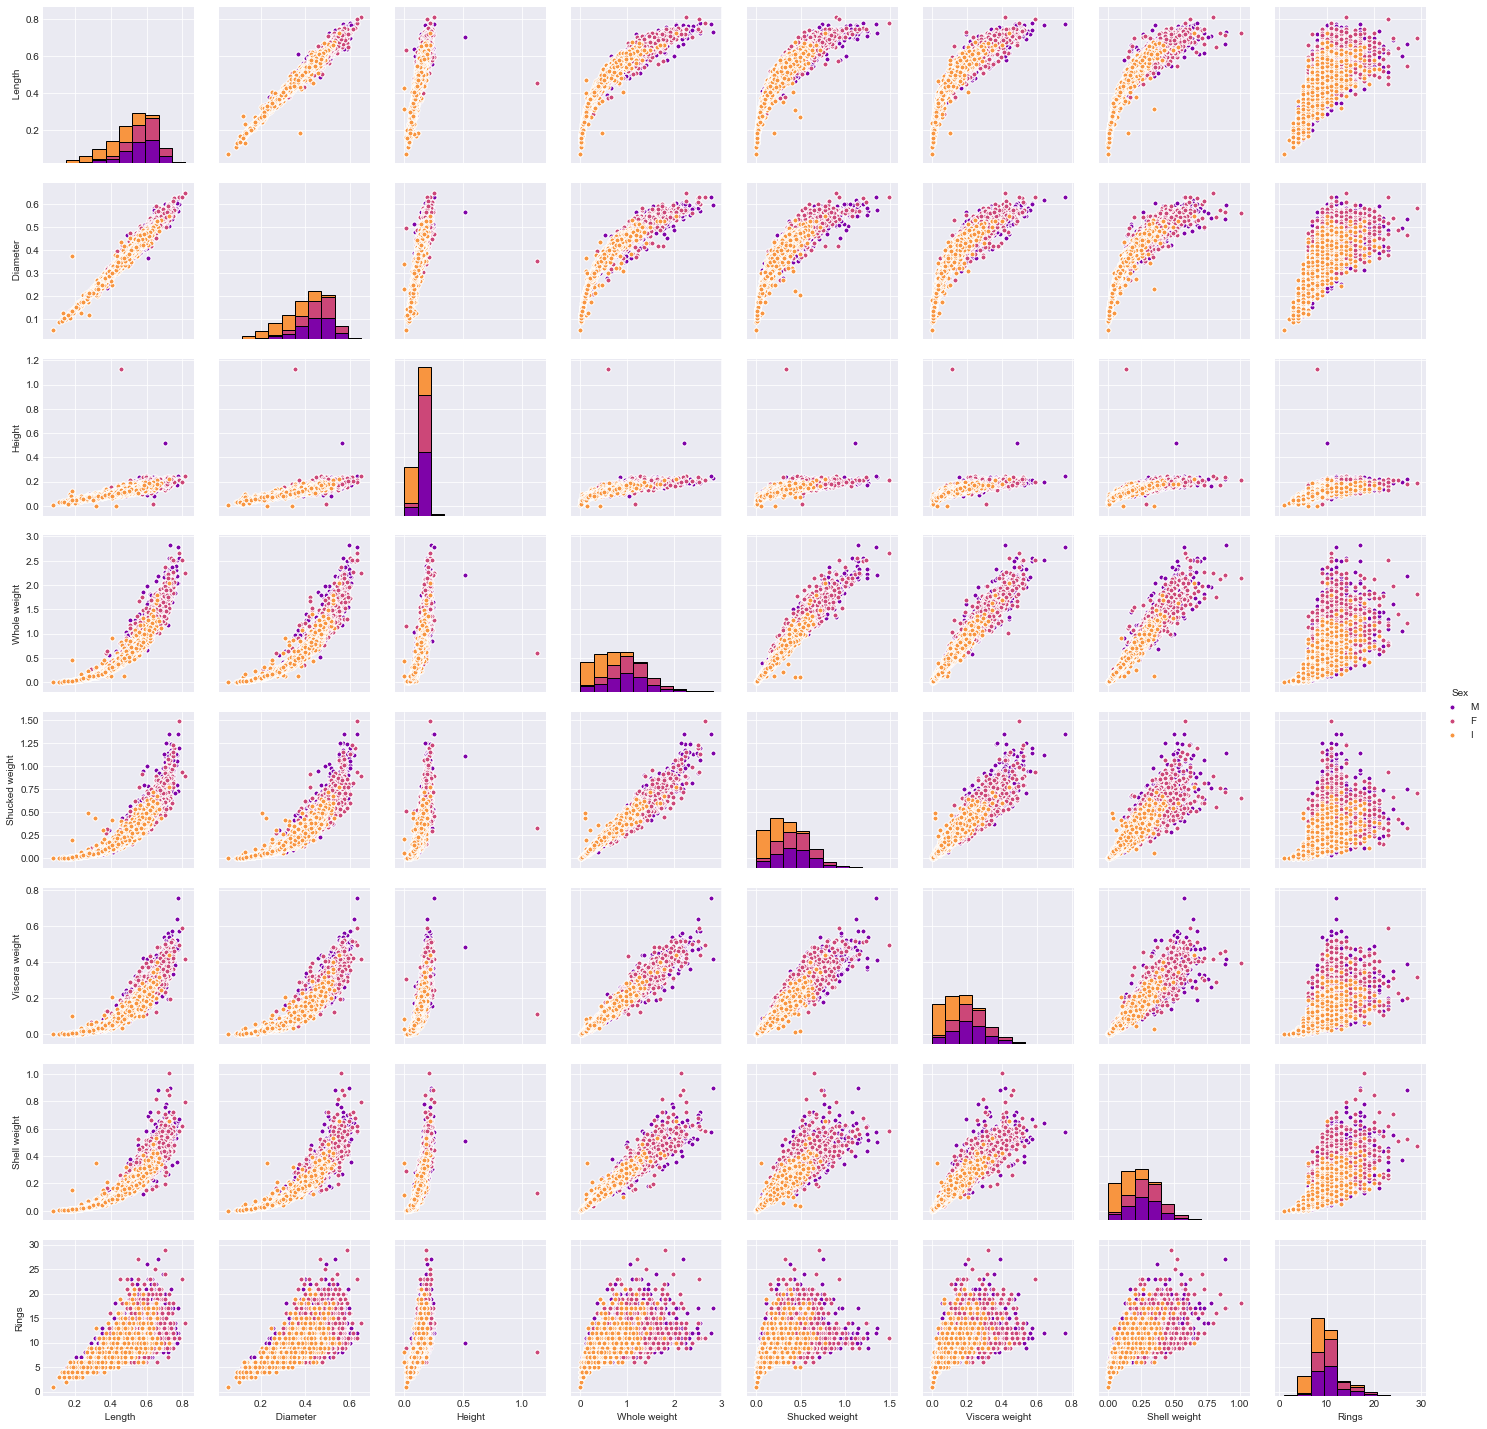

In [11]:
sns.pairplot(df,hue='Sex',palette='plasma',             
             plot_kws={'s':25}, 
             diag_kws={'edgecolor':'k'} )

C:\Users\Ehtasham\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ehtasham\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


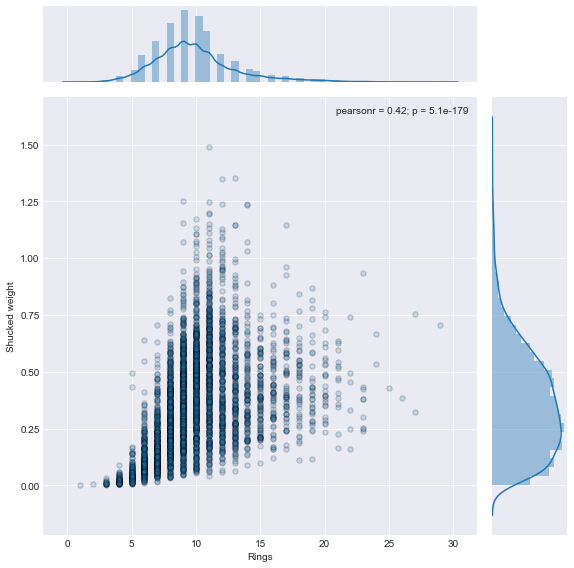

In [12]:
sns.jointplot('Rings','Shucked weight',data =df, alpha = 0.2,edgecolors='k',size = 8,
             joint_kws= {'s':28},
             marginal_kws= {'kde':'True'} )

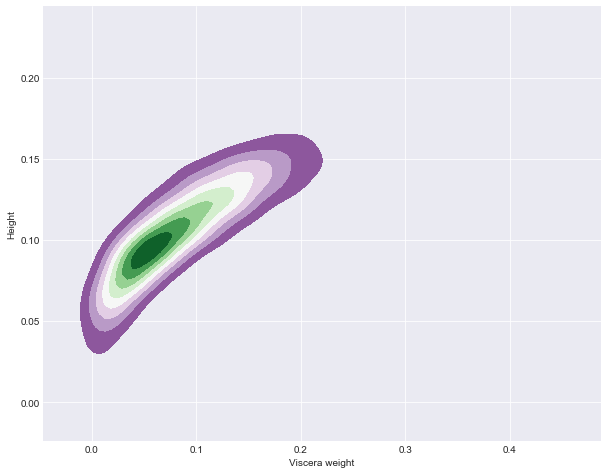

In [13]:
plt.figure(figsize=(10,8))
sns.kdeplot(df[df['Sex']=='I']['Viscera weight'],df[df['Sex']=='I']['Height'],
            shade=True, shade_lowest=False,cmap='PRGn')

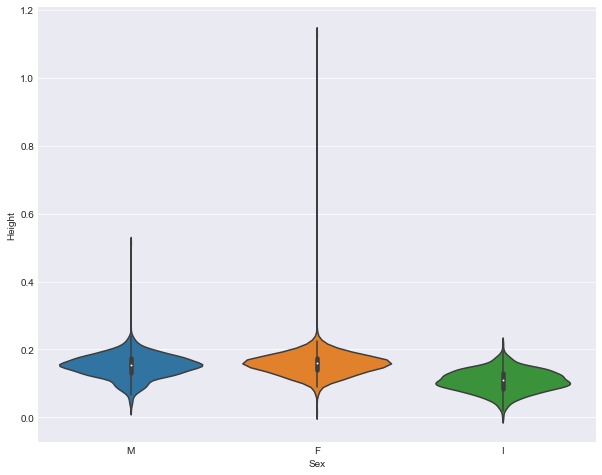

In [14]:
plt.figure(figsize=(10,8))
sns.violinplot(x= 'Sex',y='Height',data = df)

C:\Users\Ehtasham\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ehtasham\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


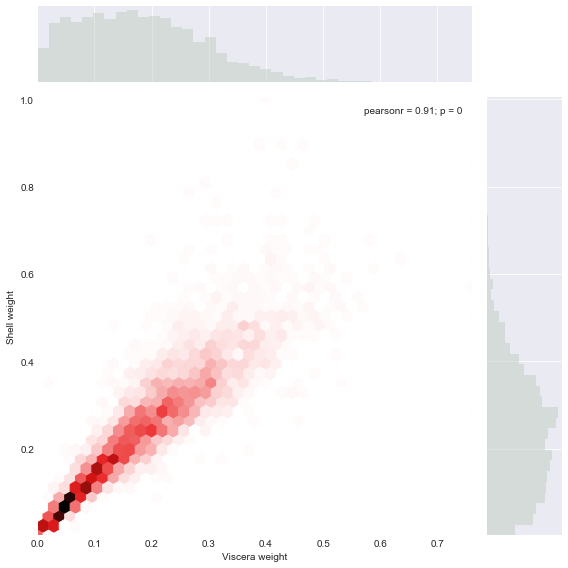

In [15]:

sns.jointplot('Viscera weight','Shell weight',df,kind='hex',size=8,color ='#a71010',
              marginal_kws= {'color':'#b3c6b1'} )

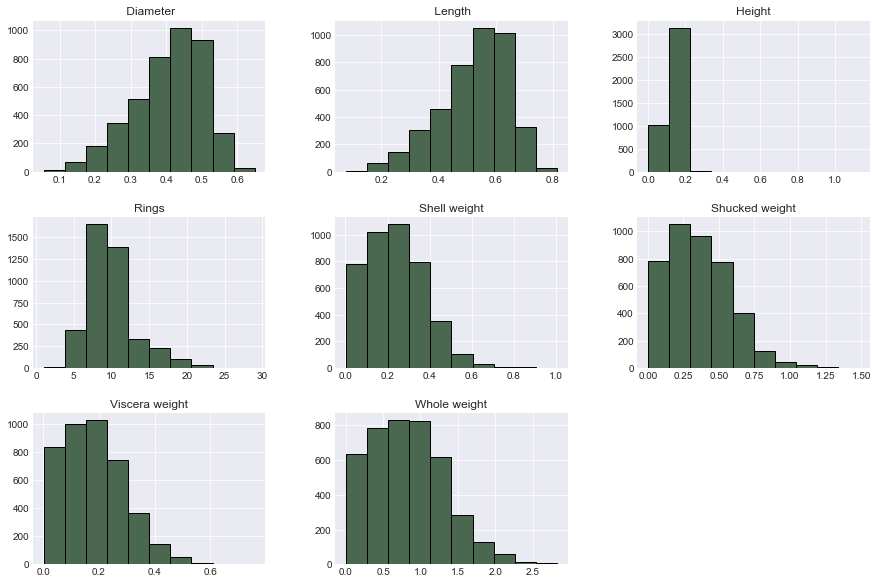

In [16]:
df.hist(edgecolor='k',color='#4a6850',figsize=(15,10))
plt.show()

In [17]:
df.skew()

 Length          -0.639873
 Diameter        -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [223]:
final_data = pd.get_dummies(df,columns = ['Sex'],drop_first=True)

In [224]:
from sklearn.linear_model import LinearRegression

In [225]:
lr = LinearRegression()

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
x= final_data.drop('Rings',axis = 1)
y = final_data['Rings']
test_size= 0.30
seed = 7

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

# Linear Regression

In [30]:
lr.fit(x_train,y_train)

In [113]:
y_hat_lr = lr.predict(x_test)

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
mean_squared_error(y_test,y_hat_lr)

5.298353232409886

In [118]:
lr.coef_

array([  1.5615924 ,  10.11997194,   8.67203161,   9.55734541,
       -19.64024933, -11.32780834,   6.37514007,  -0.74342647,
         0.06602205])

In [121]:
lr.intercept_

3.5833281758015003

In [72]:
print('Regression model Intercept {}'.format(lr.intercept_))
print('\n')
print('Regression Model Coefficient {}'.format(lr.coef_))

Regression model Intercept 3.7246520613786434


Regression Model Coefficient [  1.08361345  10.44040527   8.83888241   9.40395181 -19.63637742
 -11.30955667   6.85127772  -0.80989604   0.03779559]


** Finding p-values by statmodels package**

In [77]:
import statsmodels.formula.api as smf
final_data_2 = np.append(arr= np.ones((4177,1)).astype(int),values =final_data,axis=1 )

In [93]:
x_opt = final_data_2[:,[0,1,2,3,4,5,6,7,9,10]]
y = final_data_2[:,-3]

In [102]:
final_data.head()

Length   Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0    0.455      0.365   0.095        0.5140          0.2245          0.1010   
1    0.350      0.265   0.090        0.2255          0.0995          0.0485   
2    0.530      0.420   0.135        0.6770          0.2565          0.1415   
3    0.440      0.365   0.125        0.5160          0.2155          0.1140   
4    0.330      0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_I  Sex_M  
0         0.150     15      0      1  
1         0.070      7      0      1  
2         0.210      9      0      0  
3         0.155     10      0      1  
4         0.055      7      1      0

In [98]:
fitting = smf.OLS(endog=y,exog=x_opt).fit()

In [103]:
fitting.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        21:46:01   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8946      0.292     13.358      0.000       3.323       4.466
x1            -0.4583      1.809     -0.253      0.800      -4.005       3.089
x2            11.0751      2.227      4.972      0.000       6.708      15.442
x3            10.7615      1.536      7.005      0.000       7.750      13.773
x4             8.9754      0.725     12.373      0.000       7.553      10.398
x5           -19.7869      0.817    -24.209      0.000     -21.389     -18.184
x6           -10.5818      1.294     -8.179      0.000     -13.118      -8.045
x7             8.7418      1.125      7.772      0.000       6.537      10.947
x8            -0.8249      0.102     -8.056      0.000      -1.026      -0.624
x9             0.0577      0.083      0.692      0.489      -0.106       0.221
==============================================================================
Omnibus:                      947.032   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.271
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       6.162   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

** removing variables with high p-value**

In [109]:
x_opt_1 = final_data_2[:,[0,2,3,4,5,6,7,9]]
y = final_data_2[:,-3]

In [110]:
fitting_1 = smf.OLS(endog=y,exog=x_opt_1).fit()

In [111]:
fitting_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     693.1
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        21:49:22   Log-Likelihood:                -9204.4
No. Observations:                4177   AIC:                         1.842e+04
Df Residuals:                    4169   BIC:                         1.848e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9157      0.267     14.644      0.000       3.391       4.440
x1            10.5383      0.988     10.669      0.000       8.602      12.475
x2            10.7251      1.535      6.988      0.000       7.716      13.734
x3             8.9743      0.725     12.375      0.000       7.553      10.396
x4           -19.7690      0.813    -24.304      0.000     -21.364     -18.174
x5           -10.6481      1.287     -8.275      0.000     -13.171      -8.125
x6             8.7497      1.124      7.785      0.000       6.546      10.953
x7            -0.8607      0.089     -9.629      0.000      -1.036      -0.685
==============================================================================
Omnibus:                      945.947   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2702.996
Skew:                           1.180   Prob(JB):                         0.00
Kurtosis:                       6.156   Cond. No.                         73.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Hadelins Way**

In [114]:
import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((4177,10)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x

In [115]:
SL = 0.05
x_opt = final_data_2[:,[0,1,2,3,4,5,6,7,9,10]]
y = final_data_2[:,-3]
x_Modeled = backwardElimination(x_opt, SL)

In [116]:
x_Modeled

array([[1.    , 0.365 , 0.095 , ..., 0.101 , 0.15  , 0.    ],
       [1.    , 0.265 , 0.09  , ..., 0.0485, 0.07  , 0.    ],
       [1.    , 0.42  , 0.135 , ..., 0.1415, 0.21  , 0.    ],
       ...,
       [1.    , 0.475 , 0.205 , ..., 0.2875, 0.308 , 0.    ],
       [1.    , 0.485 , 0.15  , ..., 0.261 , 0.296 , 0.    ],
       [1.    , 0.555 , 0.195 , ..., 0.3765, 0.495 , 0.    ]])

In [125]:
from sklearn.metrics import mean_squared_error

In [127]:
mean_squared_error(y_test,y_hat_lr)

5.298353232409886

# Error Visualization

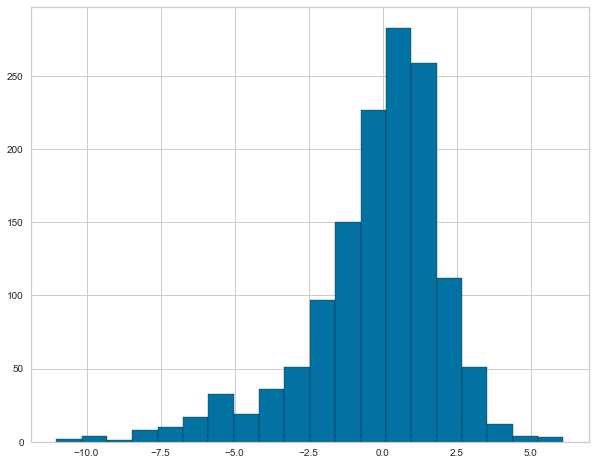

In [128]:
plt.figure(figsize=(10,8))
plt.hist(y_hat_lr-y_test,edgecolor='k',bins=20)
plt.show()

**1. Prediction Error Plot**

In [129]:
from yellowbrick.regressor import PredictionError

In [130]:
visualizer_lr = PredictionError(lr)

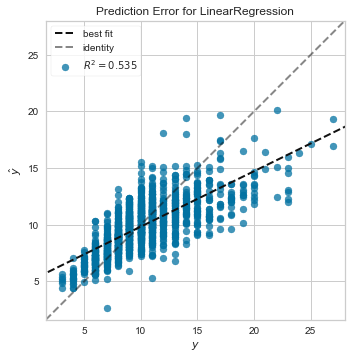

In [131]:
visualizer_lr.fit(x_train,y_train)
visualizer_lr.score(x_test,y_test)
visualizer_lr.poof()

**2. Residuals Plot**

In [35]:
from yellowbrick.regressor import ResidualsPlot

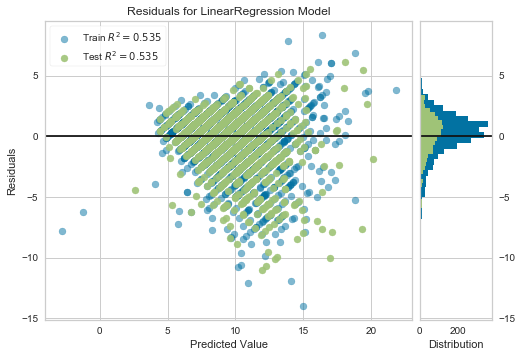

In [132]:
visualizer_lr_res = ResidualsPlot(lr)
visualizer_lr_res.fit(x_train,y_train)
visualizer_lr_res.score(x_test,y_test)
visualizer_lr_res.poof()

# Ridge Regression

In [133]:
from sklearn.linear_model import Ridge

In [134]:
ridge_reg = Ridge()

In [121]:
from sklearn.model_selection import KFold,GridSearchCV

In [136]:
kfold = KFold(n_splits=10,random_state=500)
alpha_grid = [0.5,1.0,1.5,2.0,2.5,3.0]
param_grid= dict(alpha=alpha_grid)
grid_ridge = GridSearchCV(ridge_reg,param_grid=param_grid,n_jobs=-1,verbose=3,cv=kfold)

In [139]:
grid_result_ridge = grid_ridge.fit(x_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.4s finished


In [140]:
y_hat_ridge = grid_ridge.predict(x_test)

# ERROR VISUALIZATION

In [43]:
from sklearn.metrics import mean_squared_error

In [141]:
mean_squared_error(y_test,y_hat_ridge)

5.339299773401331

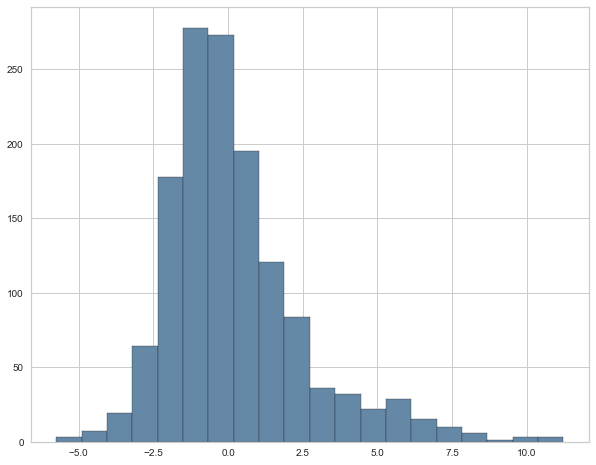

In [142]:
plt.figure(figsize=(10,8))
plt.hist(y_test-y_hat_ridge,bins=20,edgecolor='k',color='#6588a7')
plt.show()

In [46]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

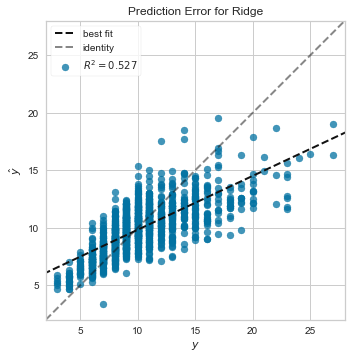

In [143]:
visualizer_rid = PredictionError(ridge_reg)
visualizer_rid.fit(x_train,y_train)
visualizer_rid.score(x_test,y_test)
visualizer_rid.poof()

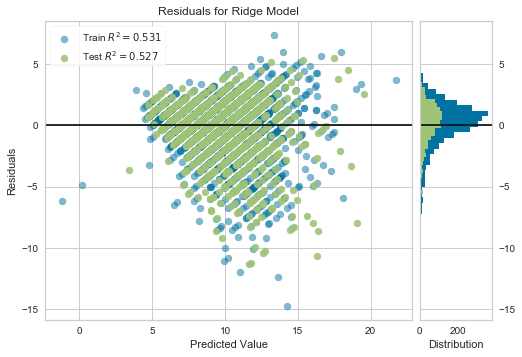

In [144]:
visualizer_rid_rs = ResidualsPlot(ridge_reg)
visualizer_rid_rs.fit(x_train,y_train)
visualizer_rid_rs.score(x_test,y_test)
visualizer_rid_rs.poof()

In [145]:
y_table = pd.DataFrame({'Actual':y_test,'Predtiction':y_hat_ridge})

In [146]:
y_table['Residuals'] = y_table['Actual']-y_table['Predtiction']

In [147]:
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
import  cufflinks  as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [148]:
y_table.iplot(kind='scatter',mode='markers',size=3)

In [149]:
y_table.iplot(kind='bubble',x='Actual',y= 'Predtiction',size='Residuals',mode='markers',color='#a6c143')

In [150]:
y_table.iplot(kind='surface')

# lasso Regression

In [151]:
from sklearn.linear_model import Lasso

In [164]:
ls= Lasso()

In [165]:
from sklearn.model_selection import train_test_split,KFold,GridSearchCV

In [166]:
x = final_data.drop('Rings',axis=1)
y = final_data['Rings']
test_size=0.3
seed=7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [199]:
kfold = KFold(n_splits=10,random_state=seed)
alpha = np.arange(0.5,5,0.5)
fit_intercept= ['True','False']
param_grid = dict(alpha = alpha_grid,fit_intercept=fit_intercept)
grid_ls = GridSearchCV(ls,param_grid=param_grid,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3,cv=kfold)

In [201]:
grid_result_ls = grid_ls.fit(x_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.1s finished


In [218]:
print('Hyper-Paramaters {}'.format(grid_result_ls.best_params_))
print('\n')
print('Coefficients{} & Intercept {}'.format(ls.coef_, ls.intercept_))

Hyper-Paramaters {'alpha': 0.5, 'fit_intercept': 'True'}


Coefficients[ 0.  0.  0.  0.  0.  0.  0. -0.  0.] & Intercept 9.876838864180636


In [219]:
y_hat_ls = grid_result_ls.predict(x_test)

In [220]:
from sklearn.metrics import mean_squared_error

In [221]:
mean_squared_error(y_test,y_hat_ls)

9.326291623387693

# Error Visualization

In [172]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

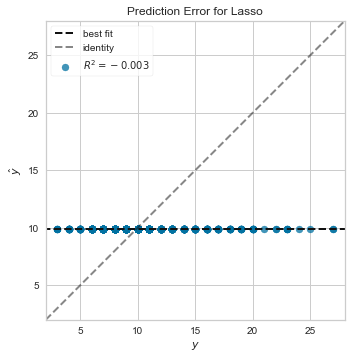

In [222]:
visualizer_ls = PredictionError(ls)
visualizer_ls.fit(x_train,y_train)
visualizer_ls.score(x_test,y_test)
visualizer_ls.poof()

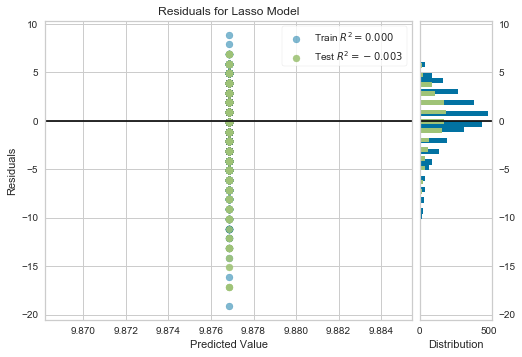

In [223]:
visualizer_ls_res = ResidualsPlot(ls)
visualizer_ls_res.fit(x_train,y_train)
visualizer_ls_res.score(x_test,y_test)
visualizer_ls_res.poof()

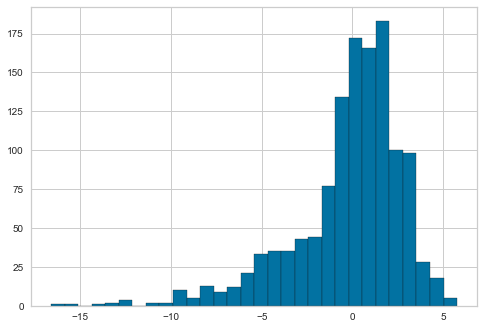

In [233]:
plt.hist( y_hat_ls-y_test,bins=30,edgecolor='k')
plt.show()

# Elasticnet Regression

In [234]:
from sklearn.linear_model import ElasticNet

In [235]:
en = ElasticNet()

In [263]:
alpha=np.arange(0.5,5,0.5) 
l1_ratio=np.arange(0.5,1,0.1)
fit_intercept= ['True','Flase']
param_grid = dict(alpha=alpha,l1_ratio=l1_ratio,fit_intercept=fit_intercept)
grid_en = GridSearchCV(en,param_grid=param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=kfold,verbose=3)

In [264]:
grid_result_en = grid_en.fit(x_train,y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    5.8s finished


In [253]:
print('Hyper-Paramaters {}'.format(grid_result_en.best_params_))
print('\n')
#print('Coefficients{} & Intercept {}'.format(en.coef_, en.intercept_))

Hyper-Paramaters {'alpha': 0.5, 'fit_intercept': 'True', 'l1_ratio': 0.5}




In [266]:
y_hat_en = grid_result_en.predict(x_test)

In [267]:
mean_squared_error(y_test,y_hat_en)

9.19972549956522

# error visualiztion

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    5.9s finished


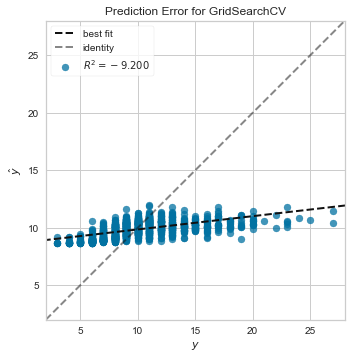

In [261]:
visualizer_en = PredictionError(grid_en)
visualizer_en.fit(x_train,y_train)
visualizer_en.score(x_test,y_test)
visualizer_en.poof()

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    6.2s finished


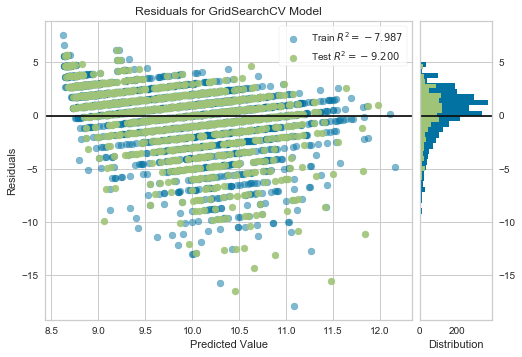

In [262]:
visualizer_en_res = ResidualsPlot(grid_en)
visualizer_en_res.fit(x_train,y_train)
visualizer_en_res.score(x_test,y_test)
visualizer_en_res.poof()

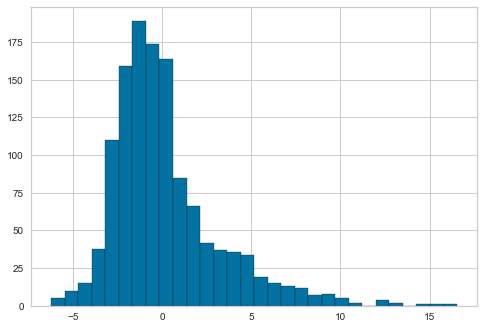

In [271]:
plt.hist(y_test - y_hat_en,bins=30,edgecolor='k') 
plt.show()

# Non-Linear Regression

# Support Vector Machine Regression

In [119]:
from sklearn.svm import SVR

In [335]:
svr = SVR(cache_size=500,C=1)

In [336]:
svr.fit(x_train,y_train)

SVR(C=1, cache_size=500, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [337]:
y_hat_svr = svr.predict(x_test)

** Error Visualization**

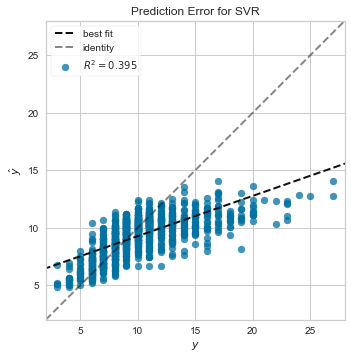

In [338]:
visualizer_svr = PredictionError(svr)
visualizer_svr.fit(x_train,y_train)
visualizer_svr.score(x_test,y_test)
visualizer_svr.poof()

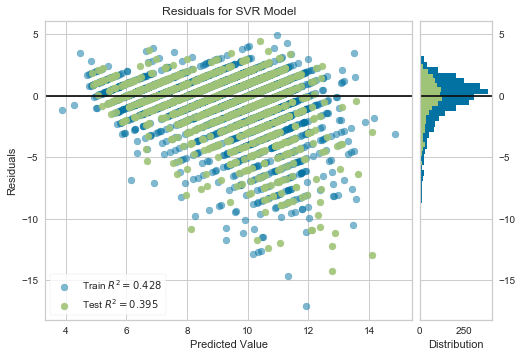

In [339]:
visualizer_svr_res = ResidualsPlot(svr)
visualizer_svr_res.fit(x_train,y_train)
visualizer_svr_res.score(x_test,y_test)
visualizer_svr_res.poof()

In [340]:
mean_squared_error(y_test,y_hat_svr)

6.837764104235713

# Gradient Tree Boosting

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

In [357]:
gbr = GradientBoostingRegressor()

In [358]:
#learning_rate=0.1, n_estimators=100,max_depth=3
learning_rate = np.arange(0.05,0.1,0.01)
n_estimators= np.arange(100,800,100)
max_depth = np.arange(3,10,1)
param_grid = dict(learning_rate = learning_rate ,n_estimators=n_estimators,max_depth=max_depth)
grid_gbr = GridSearchCV(gbr,param_grid=param_grid,n_jobs=-1,cv=kfold,verbose=3)



In [359]:
grid_result_gbr=  grid_gbr.fit(x_train,y_train)

Fitting 10 folds for each of 245 candidates, totalling 2450 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 2450 out of 2450 | elapsed: 29.4min finished


In [360]:
y_hat_gbr= grid_result_gbr.predict(x_test)

In [361]:
mean_squared_error(y_test,y_hat_gbr)

5.059785262272184

Fitting 10 folds for each of 245 candidates, totalling 2450 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 2450 out of 2450 | elapsed: 31.5min finished


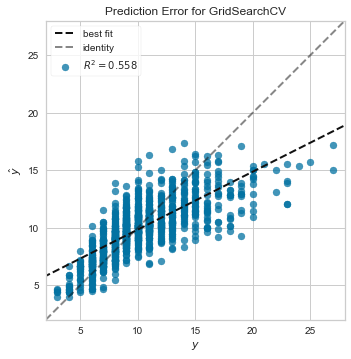

In [362]:
visualizer_gbr = PredictionError(grid_gbr)
visualizer_gbr.fit(x_train,y_train)
visualizer_gbr.score(x_test,y_test)
visualizer_gbr.poof()

Fitting 10 folds for each of 245 candidates, totalling 2450 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 2450 out of 2450 | elapsed: 32.7min finished


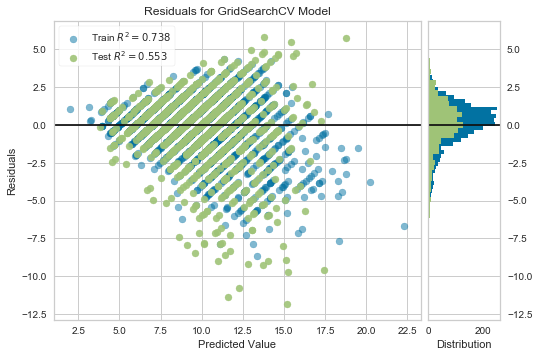

In [363]:
visualizer_gbr_res = ResidualsPlot(grid_gbr)
visualizer_gbr_res.fit(x_train,y_train)
visualizer_gbr_res.score(x_test,y_test)
visualizer_gbr_res.poof()

# Random Forest Regression

In [228]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import mean_squared_error

In [248]:
rfr = RandomForestRegressor(random_state=seed,n_estimators=150)

In [231]:
n_estimators= [100,120,150,180]
max_features=['auto','sqrt']
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
scoring='neg_mean_squared_error'
seed=7
kfold = KFold(n_splits=10,random_state=seed)
grid_rfr = GridSearchCV(rfr,param_grid=param_grid,scoring=scoring, n_jobs=-1,cv=5,verbose=3)

In [235]:
grid_result_rfr = grid_rfr(x_train,y_train)

In [249]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=7, verbose=0, warm_start=False)

In [250]:
y_hat_rfr = rfr.predict(x_test)

In [251]:
mean_squared_error(y_test,y_hat_rfr)

5.039638950912636

** Error Visualization**

In [252]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

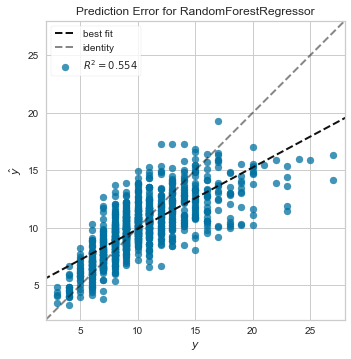

In [254]:
visualizer_rfr = PredictionError(rfr)
visualizer_rfr.fit(x_train,y_train)
visualizer_rfr.score(x_test,y_test)
visualizer_rfr.poof()

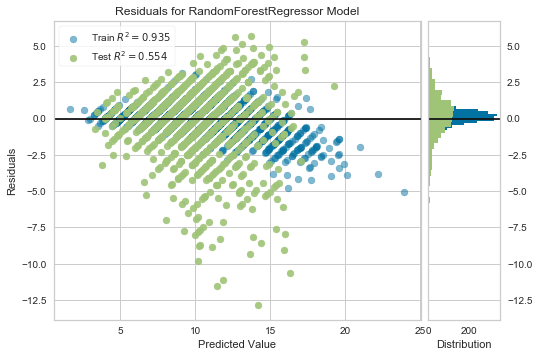

In [265]:
visualizer_rfr_res = ResidualsPlot(rfr)
visualizer_rfr_res.fit(x_train,y_train)
visualizer_rfr_res.score(x_test,y_test)
visualizer_rfr_res.poof()

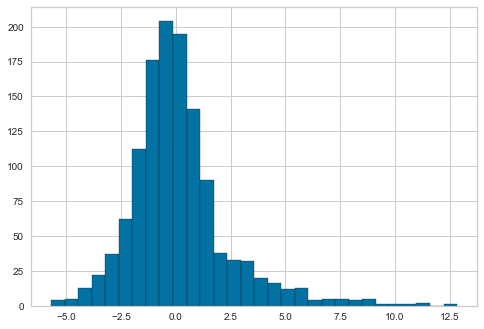

In [263]:
plt.hist(y_test-y_hat_rfr,bins=30,edgecolor='k')
plt.show()